<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip insatll numpy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ERROR: unknown command "insatll" - maybe you meant "install"


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


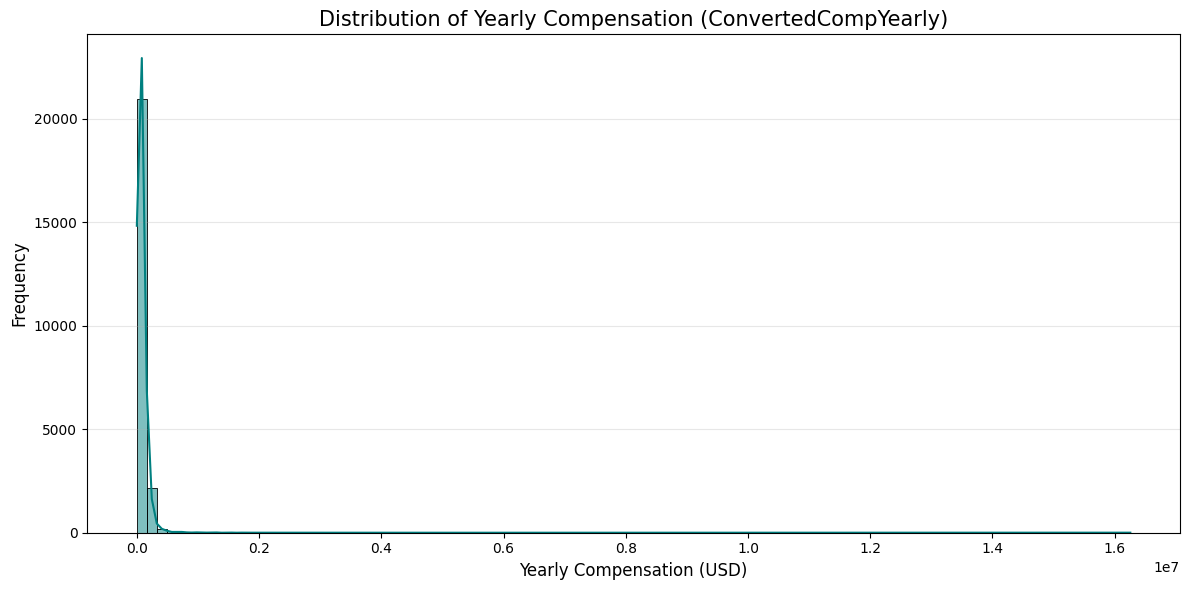

In [8]:
## Write your code here
# Prepare the data
comp_data = df['ConvertedCompYearly'].dropna()

plt.figure(figsize=(12, 6))
sns.histplot(comp_data, kde=True, bins=100, color='teal')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=15)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('comp_distribution_hist.png')
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [9]:
## Write your code here
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate the median compensation for this subset
median_comp_full_time = full_time_df['ConvertedCompYearly'].median()

# Print the result formatted as currency
print(f"The median compensation for full-time employees is: ${median_comp_full_time:,.2f}")

# Compare with the overall dataset median
overall_median = df['ConvertedCompYearly'].median()
print(f"The overall median compensation (all employment types) is: ${overall_median:,.2f}")

The median compensation for full-time employees is: $69,814.00
The overall median compensation (all employment types) is: $65,000.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



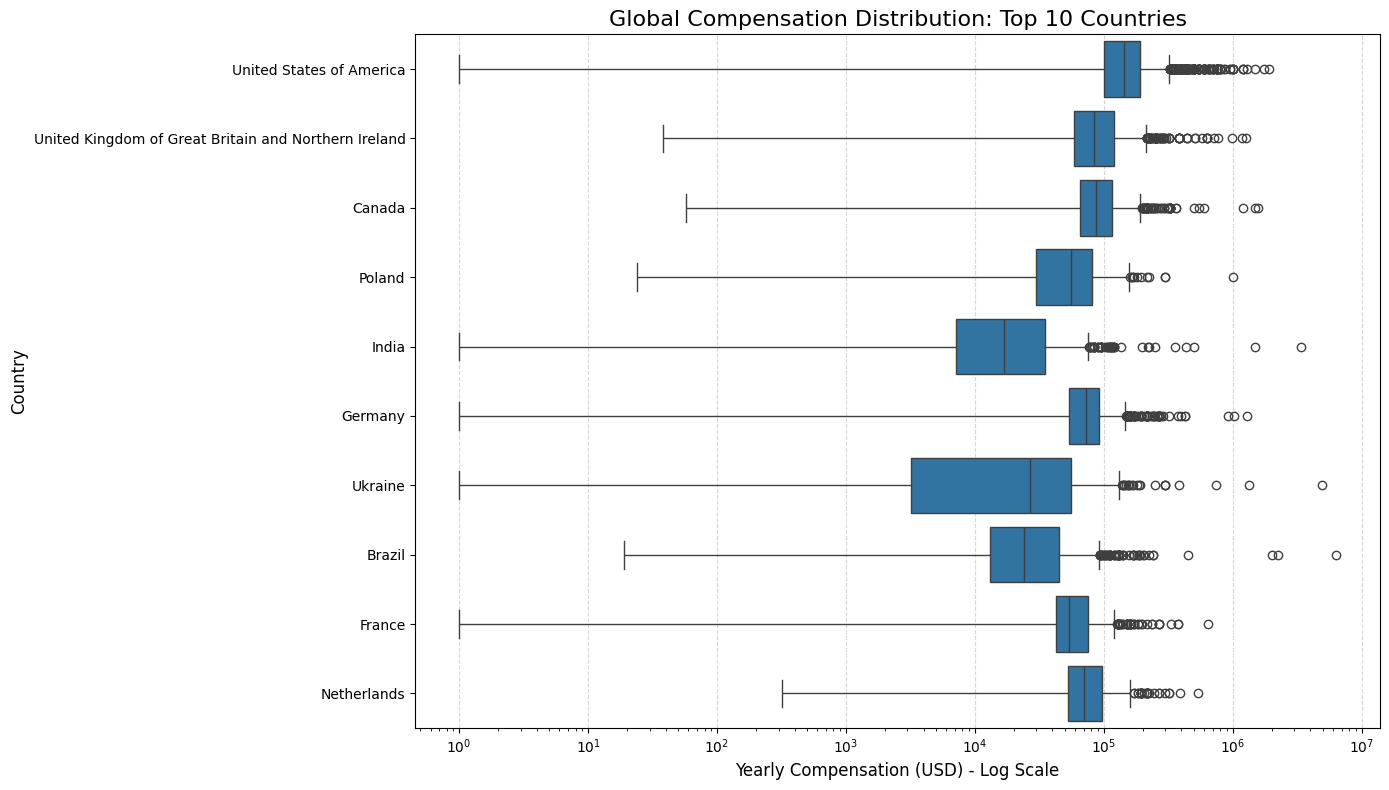

In [11]:
## Write your code here
# Filter for the top 10 countries with the most respondents
top_countries = df['Country'].value_counts().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

# Create the Box Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_countries, x='ConvertedCompYearly', y='Country', 
             orient='h')
plt.xscale('log')
plt.title('Global Compensation Distribution: Top 10 Countries', fontsize=16)
plt.xlabel('Yearly Compensation (USD) - Log Scale', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [12]:
## Write your code here
# Calculate Quartiles and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define Bounds for Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create the Refined DataFrame
# We filter to keep only the values within the calculated bounds
df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                (df['ConvertedCompYearly'] <= upper_bound)].copy()

# Validation of Data Reduction
print(f"Original Dataset Size: {len(df)}")
print(f"Refined Dataset Size:  {len(df_refined)}")
print(f"Number of Outliers Removed: {len(df) - len(df_refined)}")

Original Dataset Size: 65437
Refined Dataset Size:  22457
Number of Outliers Removed: 42980


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.153182        0.020156
WorkExp                         0.153182  1.000000       -0.028839
JobSatPoints_1                  0.020156 -0.028839        1.000000


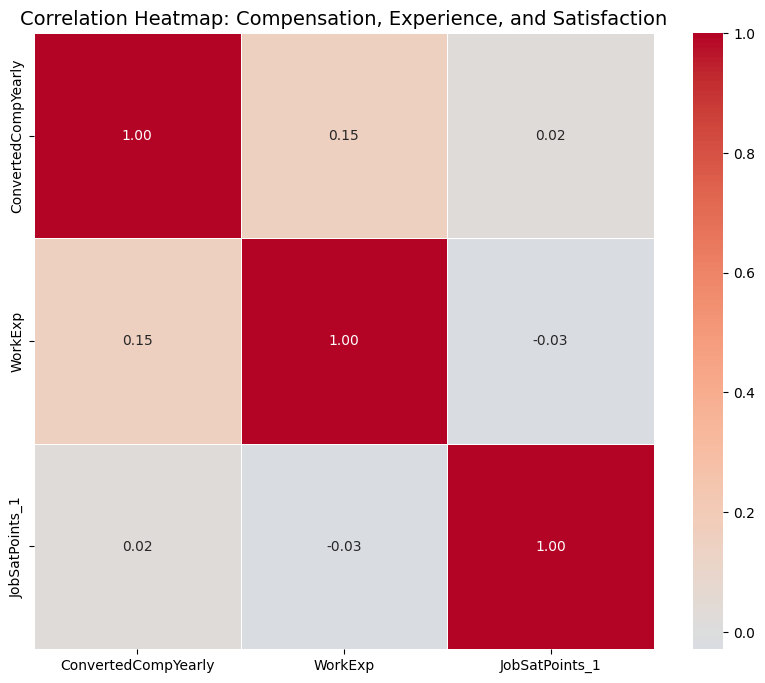

In [13]:
## Write your code here
# Select the specific columns
# We filter for these three columns and drop rows with missing values
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df_corr = df[cols].dropna()

# Calculate the Correlation Matrix
# This computes the Pearson correlation coefficient between pairs of variables
correlation_matrix = df_corr.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,          # Show the numeric values in the cells
    cmap='coolwarm',     # Color map (red for positive, blue for negative)
    fmt=".2f",           # Format to 2 decimal places
    center=0,            # Ensure 0 is the neutral color
    linewidths=0.5
)

plt.title('Correlation Heatmap: Compensation, Experience, and Satisfaction', fontsize=14)
plt.savefig('comp_exp_sat_heatmap.png')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


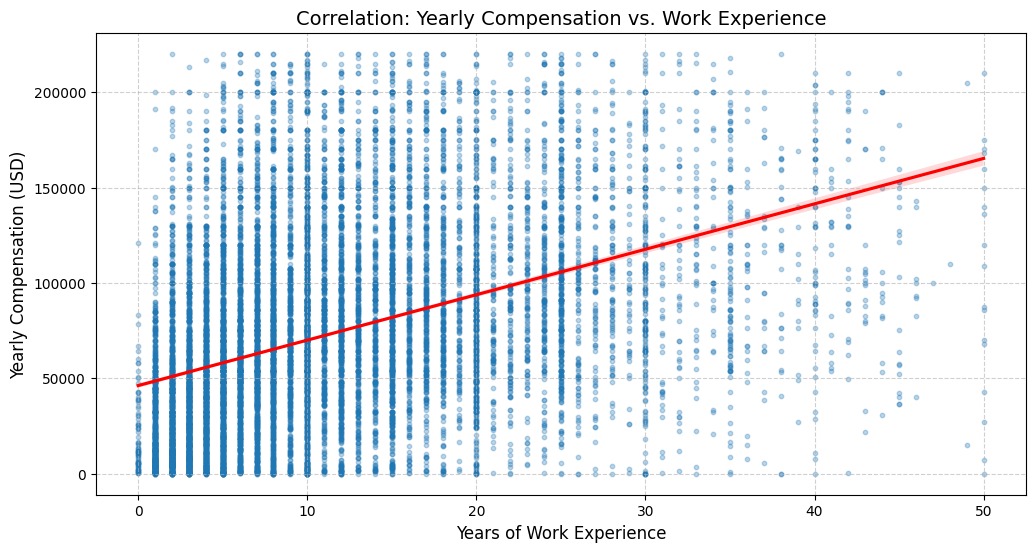

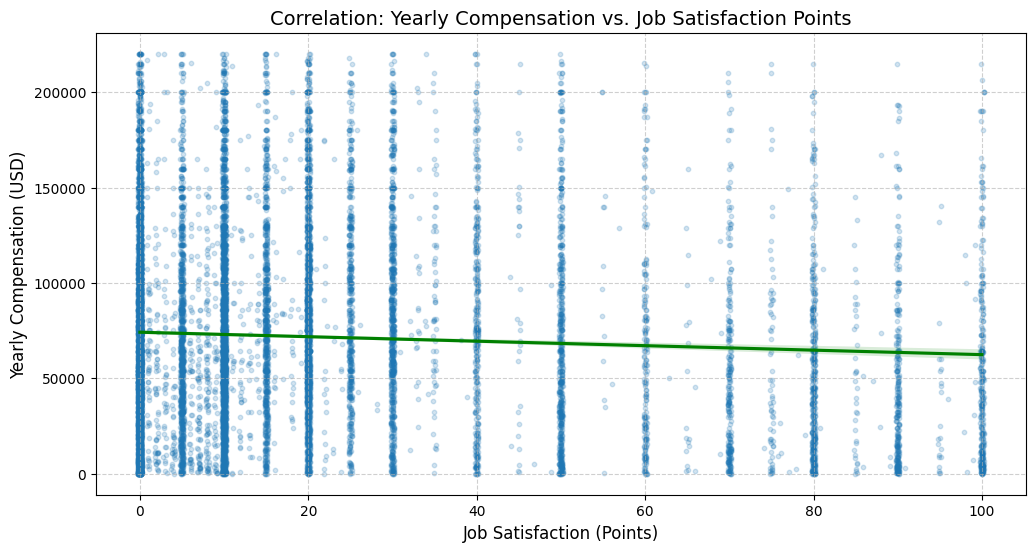

In [14]:
## Write your code here
# Refine Data: Remove outliers for ConvertedCompYearly to make plots readable
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Create a filtered dataframe for visualization
df_viz = df[df['ConvertedCompYearly'] <= upper_bound].copy()

# Scatter Plot: Compensation vs. Work Experience
plt.figure(figsize=(12, 6))
sns.regplot(data=df_viz, x='WorkExp', y='ConvertedCompYearly', 
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
plt.title('Correlation: Yearly Compensation vs. Work Experience', fontsize=14)
plt.xlabel('Years of Work Experience', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('comp_vs_workexp_scatter.png')

# Scatter Plot: Compensation vs. Job Satisfaction
# JobSatPoints_1 is often an ordinal scale (e.g., 1-10)
plt.figure(figsize=(12, 6))
sns.regplot(data=df_viz, x='JobSatPoints_1', y='ConvertedCompYearly', 
            x_jitter=0.2, scatter_kws={'alpha':0.2, 's':10}, line_kws={'color':'green'})
plt.title('Correlation: Yearly Compensation vs. Job Satisfaction Points', fontsize=14)
plt.xlabel('Job Satisfaction (Points)', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('comp_vs_jobsat_scatter.png')

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
